In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
path ='data/crime_astros_final.csv'
games = 'sports_scores/astros_1A10.csv'

In [3]:
df = pd.read_csv(path)
df=df.rename(columns = {'Unnamed: 0':'date','Hour':'hour'})
df.hour = df.hour.astype(int)
df.day = df.day.astype(int)
df.year = df.year.astype(int)
df.date = pd.to_datetime(df.date)  # datetime index
df = df.set_index('date').sort_index(ascending=True)
#df['game_on'] = np.where(df.game =='No Game',0,1)
#df.drop(['game'],axis=1,inplace=True)
df.head()

,Beat,OffenseType,Premise,NumOffenses,hour,day,weekday,month,year,lat,lon,add,dist_stadium,game
date,,,,,,,,,,,,,,
2010-01-01,1A10,Auto Theft,bar/night club parking lot,1.0,0,1,Friday,Jan,2010,29.757212,-95.353294,"350 Hamilton St, Houston, TX 77002, USA",0.137184,No Game
2010-01-01,1A10,Theft,bar/night club,1.0,0,1,Friday,Jan,2010,29.753512,-95.363811,"1250 Caroline St, Houston, TX 77002, USA",0.549562,No Game
2010-01-01,1A10,Burglary,office building,1.0,0,1,Friday,Jan,2010,29.760954,-95.362089,"450 S Main St, Houston, TX 77002, USA",0.480008,No Game
2010-01-01,1A10,Theft,other/unknown,1.0,0,1,Friday,Jan,2010,29.755595,-95.367677,"1250 Travis St, Houston, TX 77002, USA",0.734357,No Game
2010-01-01,1A10,Theft,convention center/exhibit halls,1.0,0,1,Friday,Jan,2010,29.752015,-95.359181,"1050 Avenida De Las Americas, Houston, TX 7701...",0.403381,No Game


In [38]:
df.apply(lambda x: sum(x.isnull()))

Beat            0
OffenseType     0
Premise         0
NumOffenses     0
hour            0
day             0
weekday         0
month           0
year            0
lat             0
lon             0
add             0
dist_stadium    0
game            0
dtype: int64

In [4]:
astros = pd.read_csv(games,index_col='date').sort_index(ascending=True)

## win column
astros['win'] =  np.where(astros['team_score'] > astros['opp_score'],1,0)

astros.drop(['Unnamed: 0'],axis=1,inplace=True)
#astros[['win','season']]
astros.head()

,team,team_score,home_away,opposing,opp_score,season,beat,win
date,,,,,,,,
2010-04-05,HOU,2,HOME,SFG,5,reg,1A10,0
2010-04-06,HOU,0,HOME,SFG,3,reg,1A10,0
2010-04-07,HOU,4,HOME,SFG,10,reg,1A10,0
2010-04-09,HOU,0,HOME,PHI,8,reg,1A10,0
2010-04-10,HOU,6,HOME,PHI,9,reg,1A10,0


In [5]:
ast = astros[['win','season']]
ast.head()

,win,season
date,,
2010-04-05,0,reg
2010-04-06,0,reg
2010-04-07,0,reg
2010-04-09,0,reg
2010-04-10,0,reg


In [6]:
crime_game = df[['OffenseType','weekday','month']]
crime_game.head()

,OffenseType,weekday,month
date,,,
2010-01-01,Auto Theft,Friday,Jan
2010-01-01,Theft,Friday,Jan
2010-01-01,Burglary,Friday,Jan
2010-01-01,Theft,Friday,Jan
2010-01-01,Theft,Friday,Jan


In [7]:
cdf = crime_game.groupby(crime_game.index).agg({'OffenseType':'count','weekday':'first','month':'first'})

In [8]:
cdf.head()

,OffenseType,weekday,month
date,,,
2010-01-01,18,Friday,Jan
2010-01-02,13,Saturday,Jan
2010-01-03,12,Sunday,Jan
2010-01-04,9,Monday,Jan
2010-01-05,8,Tuesday,Jan


In [9]:
crime_merge = pd.merge(cdf,ast,  left_index=True, right_index=True, how='left')
crime_merge.head()

,OffenseType,weekday,month,win,season
date,,,,,
2010-01-01,18,Friday,Jan,NaN,NaN
2010-01-02,13,Saturday,Jan,NaN,NaN
2010-01-03,12,Sunday,Jan,NaN,NaN
2010-01-04,9,Monday,Jan,NaN,NaN
2010-01-05,8,Tuesday,Jan,NaN,NaN


In [10]:
def game_feature(df):
    if df.win == 1:
        val = 'Won Game'
    elif df.win == 0:
        val = 'Lost Game'
    else:
        val = 'No Game'
    return val

crime_merge['game'] = crime_merge.apply(game_feature,axis=1)

In [11]:
#crime_merge[['win','game']].plot(kind='bar')

In [14]:
def po_feature(df):
    if df.season == 'reg':
        val = 'Regular'
    elif df.season == 'plo':
        val = 'Playoffs'
    else:
        val = 'No game'
    return val

crime_merge['seasons'] = crime_merge.apply(po_feature,axis=1)

In [15]:
crime_merge.head()

,OffenseType,weekday,month,win,season,game,seasons
date,,,,,,,
2010-01-01,18,Friday,Jan,NaN,NaN,No Game,No game
2010-01-02,13,Saturday,Jan,NaN,NaN,No Game,No game
2010-01-03,12,Sunday,Jan,NaN,NaN,No Game,No game
2010-01-04,9,Monday,Jan,NaN,NaN,No Game,No game
2010-01-05,8,Tuesday,Jan,NaN,NaN,No Game,No game


In [16]:
cdf = crime_merge[['OffenseType','weekday','month','game','seasons']]

In [17]:
cdf.head()

,OffenseType,weekday,month,game,seasons
date,,,,,
2010-01-01,18,Friday,Jan,No Game,No game
2010-01-02,13,Saturday,Jan,No Game,No game
2010-01-03,12,Sunday,Jan,No Game,No game
2010-01-04,9,Monday,Jan,No Game,No game
2010-01-05,8,Tuesday,Jan,No Game,No game


In [18]:
cdf.seasons.unique()

array(['No game', 'Regular', 'Playoffs'], dtype=object)

/home/frank/miniconda3/envs/springboard/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


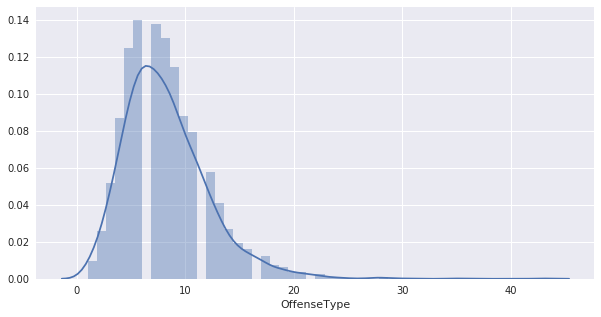

In [19]:
fig,ax = plt.subplots(figsize=(10,5))

sns.distplot(cdf['OffenseType'])

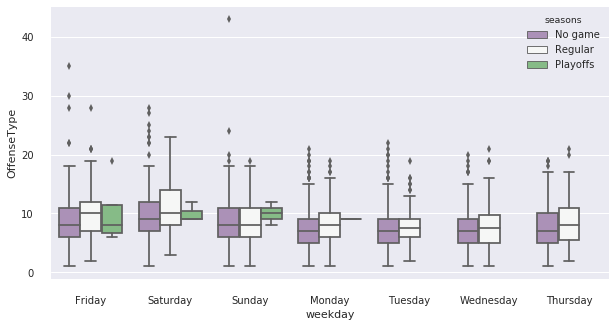

In [20]:
fig,ax = plt.subplots(figsize=(10,5))

sns.boxplot(x="weekday", y="OffenseType", hue="seasons", data=cdf, palette="PRGn")
sns.despine(offset=10, trim=True)

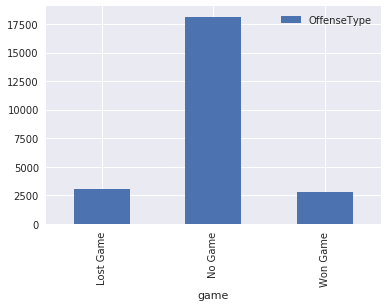

In [24]:
cdf.groupby('game').agg({'OffenseType':'sum'}).plot(kind='bar') 

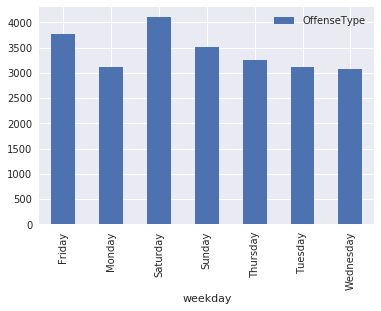

In [25]:
cdf.groupby('weekday').agg({'OffenseType':'sum'}).plot(kind='bar')

# Remove no game

In [26]:
no_game = cdf.game == 'No Game'

In [27]:
games_crime = cdf[~no_game]

/home/frank/miniconda3/envs/springboard/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


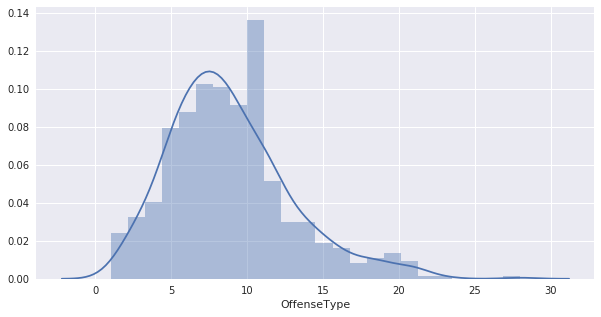

In [28]:
fig,ax = plt.subplots(figsize=(10,5))

sns.distplot(games_crime['OffenseType'])

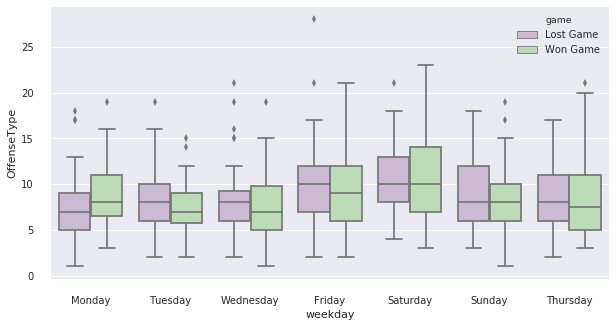

In [32]:
fig,ax = plt.subplots(figsize=(10,5))

sns.boxplot(x="weekday", y="OffenseType", hue="game", data=games_crime, palette="PRGn")
sns.despine(offset=10, trim=True)

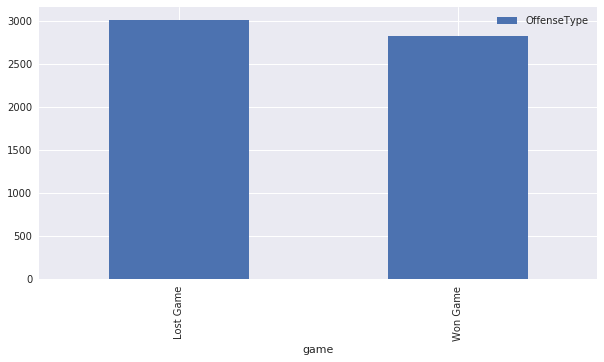

In [33]:
games_crime.groupby('game').agg({'OffenseType':'sum'}).plot(kind='bar',figsize=(10,5)) 

In [34]:
games_crime.groupby('game').agg({'OffenseType':'sum'})

,OffenseType
game,
Lost Game,3007
Won Game,2817


In [36]:
games_crime.groupby('seasons').agg({'OffenseType':'sum'})

,OffenseType
seasons,
Playoffs,100
Regular,5724


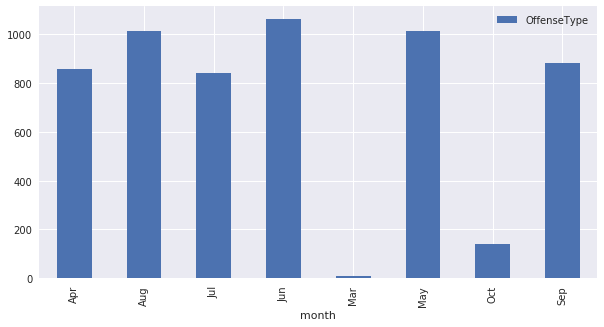

In [54]:
games_crime.groupby('month').agg({'OffenseType':'sum'}).plot(kind='bar',figsize=(10,5))

In [37]:
games_crime.apply(lambda x: sum(x.isnull()))


OffenseType    0
weekday        0
month          0
game           0
seasons        0
dtype: int64

In [42]:
games_crime.describe()

,OffenseType
count,658.000000
mean,8.851064
std,4.063313
min,1.000000
25%,6.000000
50%,8.000000
75%,11.000000
max,28.000000


In [44]:
games_crime.apply(lambda x: len(x.unique()))


OffenseType    24
weekday         7
month           8
game            2
seasons         2
dtype: int64

In [71]:
games_crime.pivot_table(columns='month',index='game',aggfunc='sum')

OffenseType                                              
month             Apr    Aug    Jul    Jun  Mar    May   Oct    Sep
game                                                               
Lost Game       502.0  483.0  462.0  563.0  NaN  531.0  46.0  420.0
Won Game        356.0  533.0  380.0  499.0  8.0  483.0  96.0  462.0

In [60]:
games_crime.

,OffenseType,weekday,month,game,seasons
date,,,,,
2010-04-05,17,Monday,Apr,Lost Game,Regular
2010-04-06,9,Tuesday,Apr,Lost Game,Regular
2010-04-07,8,Wednesday,Apr,Lost Game,Regular
2010-04-09,12,Friday,Apr,Lost Game,Regular
2010-04-10,14,Saturday,Apr,Lost Game,Regular


In [72]:
games_crime.head()

,OffenseType,weekday,month,game,seasons
date,,,,,
2010-04-05,17,Monday,Apr,Lost Game,Regular
2010-04-06,9,Tuesday,Apr,Lost Game,Regular
2010-04-07,8,Wednesday,Apr,Lost Game,Regular
2010-04-09,12,Friday,Apr,Lost Game,Regular
2010-04-10,14,Saturday,Apr,Lost Game,Regular


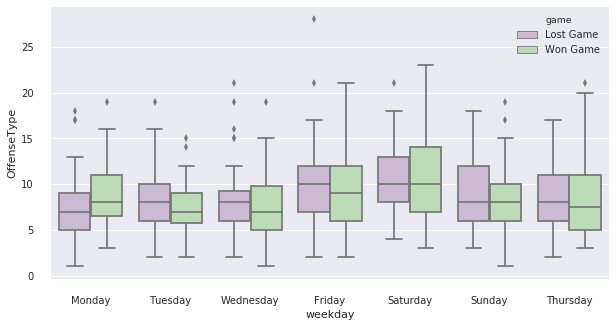

In [78]:
fig,ax = plt.subplots(figsize=(10,5))

sns.boxplot(x="weekday", y="OffenseType", hue="game", data=games_crime, palette="PRGn")
sns.despine(offset=10, trim=True)

In [80]:
games_crime.head()

,OffenseType,weekday,month,game,seasons
date,,,,,
2010-04-05,17,Monday,Apr,Lost Game,Regular
2010-04-06,9,Tuesday,Apr,Lost Game,Regular
2010-04-07,8,Wednesday,Apr,Lost Game,Regular
2010-04-09,12,Friday,Apr,Lost Game,Regular
2010-04-10,14,Saturday,Apr,Lost Game,Regular


In [85]:
games_crimes =games_crime.rename(columns = {'OffenseType':'sum_crimes'})
games_crimes.head()

,sum_crimes,weekday,month,game,seasons
date,,,,,
2010-04-05,17,Monday,Apr,Lost Game,Regular
2010-04-06,9,Tuesday,Apr,Lost Game,Regular
2010-04-07,8,Wednesday,Apr,Lost Game,Regular
2010-04-09,12,Friday,Apr,Lost Game,Regular
2010-04-10,14,Saturday,Apr,Lost Game,Regular


In [90]:
ddf = pd.get_dummies(games_crimes,drop_first=True)

In [91]:
ddf.dtypes

sum_crimes           int64
weekday_Monday       uint8
weekday_Saturday     uint8
weekday_Sunday       uint8
weekday_Thursday     uint8
weekday_Tuesday      uint8
weekday_Wednesday    uint8
month_Aug            uint8
month_Jul            uint8
month_Jun            uint8
month_Mar            uint8
month_May            uint8
month_Oct            uint8
month_Sep            uint8
game_Won Game        uint8
seasons_Regular      uint8
dtype: object

In [92]:
ddf.head()

,sum_crimes,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,month_Aug,month_Jul,month_Jun,month_Mar,month_May,month_Oct,month_Sep,game_Won Game,seasons_Regular
date,,,,,,,,,,,,,,,,
2010-04-05,17,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2010-04-06,9,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2010-04-07,8,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
2010-04-09,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2010-04-10,14,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


## Model buiding

In [93]:
# mean based:
mean_crimes = ddf['sum_crimes'].mean()
mean_crimes

8.851063829787234

In [102]:
X = ddf.drop('sum_crimes', axis=1).values
y = ddf['sum_crimes'].values

In [109]:
ddf.head()

,sum_crimes,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,month_Aug,month_Jul,month_Jun,month_Mar,month_May,month_Oct,month_Sep,game_Won Game,seasons_Regular
date,,,,,,,,,,,,,,,,
2010-04-05,17,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2010-04-06,9,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2010-04-07,8,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
2010-04-09,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2010-04-10,14,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [105]:

# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

/home/frank/miniconda3/envs/springboard/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [110]:

# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
m = ols('sum_crimes ~ weekday_Saturday',ddf).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:             sum_crimes   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     26.81
Date:                Fri, 13 Jul 2018   Prob (F-statistic):           2.99e-07
Time:                        19:03:16   Log-Likelihood:                -1842.5
No. Observations:                 658   AIC:                             3689.
Df Residuals:                     656   BIC:                             3698.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            8.4945      0.170  

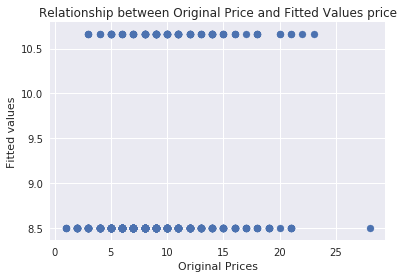

In [111]:

# your turn# your t 
plt.scatter(ddf.sum_crimes,m.fittedvalues)
plt.xlabel("Original Prices")
plt.ylabel("Fitted values")

plt.title("Relationship between Original Price and Fitted Values price")
plt.show()

In [112]:

from sklearn.linear_model import LinearRegression
X = ddf.drop('sum_crimes', axis = 1)

# This creates a LinearRegression object
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [127]:
lm.fit(X,ddf.sum_crimes)
prediction = lm.predict(X)

In [115]:
print('Estimated intercept coefficient: {}'.format(lm.intercept_))


Estimated intercept coefficient: 5.467198309492517


In [116]:
print('Number of coefficients: {}'.format(len(lm.coef_)))


Number of coefficients: 15


In [117]:

# The coefficients# The co 
pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]

,features,estimatedCoefficients
0,weekday_Monday,-1.415242
1,weekday_Saturday,1.003753
2,weekday_Sunday,-0.906149
3,weekday_Thursday,-0.943771
4,weekday_Tuesday,-1.795771
5,weekday_Wednesday,-1.891940
6,month_Aug,0.294306
7,month_Jul,0.706475
8,month_Jun,0.888432
9,month_Mar,-0.324504


In [118]:

# first five predicted crime
lm.predict(X)[0:5]

array([ 7.93976308,  7.55923335,  7.4630649 ,  9.3550047 , 10.35875786])

/home/frank/miniconda3/envs/springboard/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


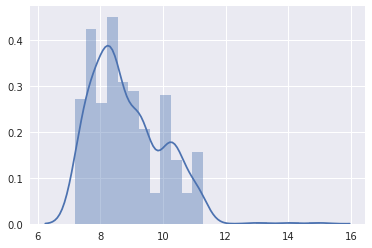

In [119]:
sns.distplot(lm.predict(X))

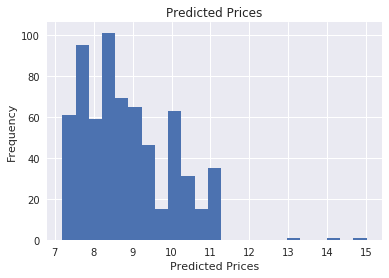

In [121]:

# your turn
plt.hist(lm.predict(X), bins='auto')
plt.title("Predicted Prices")
plt.xlabel("Predicted Prices")
plt.ylabel("Frequency")
plt.show()

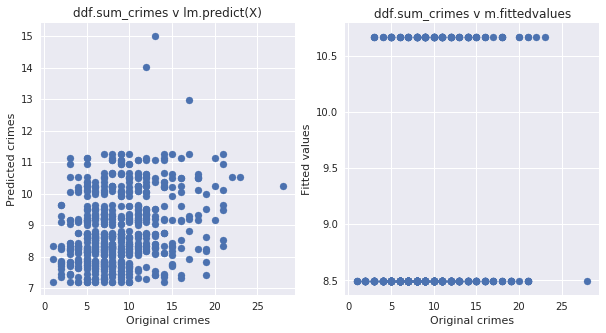

In [123]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 5), sharey=False)
ax0, ax1 = axes.flatten()

ax0.scatter(ddf.sum_crimes, lm.predict(X))
ax0.set_xlabel("Original crimes")
ax0.set_ylabel("Predicted crimes")
ax0.set_title('ddf.sum_crimes v lm.predict(X)')
ax1.set_title('ddf.sum_crimes v m.fittedvalues')
ax1.scatter(ddf.sum_crimes,m.fittedvalues)
ax1.set_xlabel("Original crimes")
ax1.set_ylabel("Fitted values")
plt.show()

In [124]:
print(np.sum((ddf.sum_crimes - lm.predict(X)) ** 2))


9999.888176145852


In [125]:
print(np.sum(lm.predict(X) - np.mean(ddf.sum_crimes)) ** 2)


1.6983859745046296e-25


In [128]:

# ESS/TSS/R_sq# ESS/TS 
RSS = np.sum((ddf.sum_crimes - prediction) ** 2)
ESS = np.sum(prediction - np.mean(ddf.sum_crimes)) ** 2
R_sq = lm.score(X, ddf.sum_crimes)

print('Residual Sum-of-Squares RSS       : {}'.format(RSS))
print('Explained Sum-of-Squares ESS      : {}'.format(ESS))
print('Coefficient of Determination R-sq : {}'.format(R_sq))

Residual Sum-of-Squares RSS       : 9999.888176145852
Explained Sum-of-Squares ESS      : 1.6983859745046296e-25
Coefficient of Determination R-sq : 0.07813077296881477


In [141]:
X = ddf.drop('sum_crimes', axis=1).values
y = ddf['sum_crimes'].values


In [144]:
# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train,y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.00037915998368920345
Root Mean Squared Error: 3.8851469054327388


In [146]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, random_state=42)

reg_all = LinearRegression()

reg_all.fit(X_train, y_train)

y_pred = reg_all.predict(X_test)

reg_all.score(X_test,y_test)  # R square,
# NEVER  use out of the box!

0.00037915998368920345

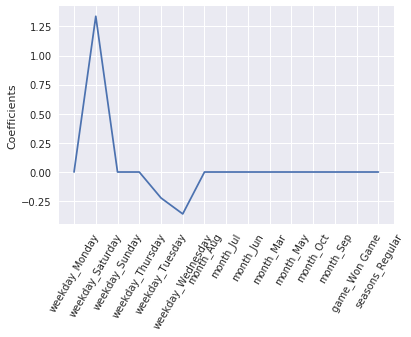

In [148]:
from sklearn.linear_model import Lasso
X = ddf.drop('sum_crimes', axis=1).values
y = ddf['sum_crimes'].values
names = ddf.drop('sum_crimes', axis=1).columns

lasso = Lasso(alpha=0.1)

lasso_coef = lasso.fit(X,y).coef_  # extract the coef attribute


# plot the coefficientrs as a function of feature names 
_ = plt.plot(range(len(names)), lasso_coef)

_ = plt.xticks(range(len(names)), names, rotation=60)

_ = plt.ylabel('Coefficients')

plt.show()